# ECDFs for Flows featurized every 2 second interval: 
Outdated - 4-Second Windows are up to date with feature upates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
import random

graph_dir = '../ECDFs/'

In [2]:
##################################### Loading in Feature Vectors ##############################
# loading in dictionary of feature vectors 2 second features
flow_load = np.load('../Feature-Vectors/2_second_features.npy')

# Keys are individual datasets of format: <dataset name>, each holds a list of numpy arrays (feature vectors)
flow_features_dict = flow_load[()]

for key in flow_features_dict:
    print(key)

globus_dtn1_src1
globus_dtn1_dest1
globus_dtn1_src2
globus_dtn1_dest2
globus_clusterdtn_src
globus_clusterdtn_dest
fdt_a2_src
fdt_a2_dest
fdt_dtn1_dest
fdt_dtn1_src
fdt_a2_dest_1str
fdt_a2_dest_2str
rclone_src
rclone_dest
rclone_src2
rclone_dest2
rclone_src3
rclone_dest3


In [3]:
#
# Function that returns an array of all 
# values of the given feature index, for 
# the given label/application and the given features to use.
#
def get_all_vals_label(application, feature_ind, data_dict):
    all_vals = []
    
    # iterates through all datasets and gets relevant feature values for the 
    # datasets belonging to the given label
    for dataset in data_dict:
        if application in dataset:
            for feature_vec in data_dict[dataset]:
                all_vals.append(feature_vec[feature_ind])
    return np.array(all_vals)

#
# Function that returns an array of all 
# values of the given feature index, for 
# the given dataset.
#
def get_all_vals_dataset(dataset, feature_ind, data_dict):
    all_vals = []
    
    for feature_vec in data_dict[dataset]:
        all_vals.append(feature_vec[feature_ind])
    return np.array(all_vals)

#
# Given an np array, returns the PDF 
# (all values sum to 1)
#
def get_pdf(arr):
    total = sum(arr)
    pdf = np.true_divide(arr, total)
    return pdf

#
# Graphs the empirical CDF for the given 
# datasets (data_list parameter holds tupel of (name, dataset))
# and formats the plot according to the given 
# title and variable. 
#
def plot_ecdf(data_list, bin_count, title, feature_name, fig_size):
    plt.figure(figsize=fig_size)
    colors = ['darkgoldenrod', 'firebrick', 'seagreen'] if len(data_list) == 3 else \
    ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for dataset in range(len(data_list))]
    
    for i, data in enumerate(data_list):
        counts, bins = np.histogram(data[1], bin_count)
        pdf = get_pdf(counts)
        cdf = np.cumsum(pdf)
        plt.plot(bins[1:], cdf, c=colors[i], label=data[0])
    plt.title(title + ' 2 Second Windows')
    plt.xlabel(feature_name)
    plt.legend()
    
    return plt

#
# Returns a list of all: (dataset/capture name, feature vectors)
# for the given application/label and features to use.
#
def get_application_features(application, feature_ind, data_dict):
    datasets = []
    
    for dataset_name in data_dict:
        if application in dataset_name:
            feature_vecs = get_all_vals_dataset(dataset_name, feature_ind, data_dict)
            datasets.append( (dataset_name, feature_vecs) )
    return datasets            
    
#
# Generates and saves an ECDF graph for each label
# for the given feature (functions graphed
# correspond to a dataset of a particular label and the given features).
#
def create_label_ecdf(feature_ind, bin_count, feature_name, data_dict):
    plot_size = (7, 5)
    
    # Globus traffic ECDFget_application_features('fdt', feature_ind)
    globus_vecs = get_application_features('globus', feature_ind, data_dict)
    plt = plot_ecdf(globus_vecs, bin_count, 
          feature_name + ' - Empirical CDF of Globus Traffic Data', feature_name,
          plot_size)
    plt.savefig(graph_dir + feature_name + '-2-' + 'Globus.png')
    
    # DTN traffic ECDF
    fdt_vecs = get_application_features('fdt', feature_ind, data_dict)
    plt = plot_ecdf(fdt_vecs, bin_count, 
          feature_name + ' - Empirical CDF of FDT Traffic Data', feature_name,
          plot_size)
    plt.savefig(graph_dir + feature_name + '-2-' + 'FDT.png')
    
    # RClone traffic ECDF
    rclone_vecs = get_application_features('rclone', feature_ind, data_dict)
    plot_ecdf(rclone_vecs, bin_count, 
          feature_name + ' - Empirical CDF of RClone Traffic Data', feature_name,
          plot_size)
    plt.savefig(graph_dir + feature_name + '-2-' + 'RClone.png')
    
# 
# Generates and saves one ECDF for all labels for the given feature.
#
def create_all_labels_ecdf(feature_ind, bin_count, feature_name, data_dict):
    all_globus = get_all_vals_label('globus', feature_ind, data_dict)
    all_fdt = get_all_vals_label('fdt', feature_ind, data_dict)
    all_rclone = get_all_vals_label('rclone', feature_ind, data_dict)

    all_data = [('Globus', all_globus), ('FDT', all_fdt), ('RClone', all_rclone),]

    plt = plot_ecdf(all_data, bin_count, 
             feature_name + ' - Empirical CDF For All Traffic Data', feature_name, (9, 7))
    plt.savefig(graph_dir + feature_name + '-2-all-apps.png')
    
#
# Graphs and saves a histogram of counts of incoming and outgoing values for the
# Direction feature of all feature vectors of a label.
#
def create_hist_all_labels():
    bins = np.arange(2)
    labels = ['mirror', 'dtn', 'youtube', 'airplane']
    colors = ['darkgoldenrod', 'firebrick', 'seagreen', 'slateblue', 'purple']
    label_ind = 0
    # Custom color legend!!
    custom_lines = [Line2D([0], [0], color='darkgoldenrod', lw=8),
                    Line2D([0], [0], color='firebrick', lw=8),
                    Line2D([0], [0], color='seagreen', lw=8),
                    Line2D([0], [0], color='slateblue', lw=8)]
    
    # creates big plot with 4 subplots, one for each label
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
    fig.legend(custom_lines, ['Mirror', 'DTN', 'YouTube', 'Airplane'], loc='center right')
    fig.suptitle('Direction of Travel Feature Value Counts For All Labels')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    for row in ax:
        for col in row:
            data = get_all_vals_label(labels[label_ind], 8)
            counts, x = np.histogram(data, 2)
            col.bar(bins, height=counts, color=colors[label_ind])
            col.set_title(labels[label_ind] + ' Direction Feature Value Counts')
            col.set_xticklabels(['', '', 'Incoming', '', '', '', 'Outgoing'])
            label_ind += 1
    plt.subplots_adjust(right=0.85, wspace=0.2, hspace =0.2)
            
#
# Graphs a histogram of counts of incoming and outgoing values for the 
# Direction of Travel feature for all datasets of the given label. 
#
def create_hist_label(label):
    bins = np.arange(2)
    datasets = [label+'1', label+'2', label+'3', label+'4', label+'5']
    colors = ['darkgoldenrod', 'firebrick', 'seagreen', 'slateblue', 'purple']
    # Custom color legend!!
    custom_lines = [Line2D([0], [0], color='darkgoldenrod', lw=8),
                    Line2D([0], [0], color='firebrick', lw=8),
                    Line2D([0], [0], color='seagreen', lw=8),
                    Line2D([0], [0], color='slateblue', lw=8)]
    label_ind = 0
    
    # creates big plot with 1 row of 5 subplots, one for each dataset of the label
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(18,8))
    fig.legend(custom_lines, ['Mirror', 'DTN', 'YouTube', 'Airplane'], loc='center right')
    fig.suptitle('Direction of Travel Feature Value Counts For Each Dataset In ' + 
                label + ' Label')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    for col in ax:
        data = get_all_vals_dataset(datasets[label_ind], 8) 
        counts, x = np.histogram(data, 2)
        col.bar(bins, height=counts, color=colors[label_ind])
        col.set_title(datasets[label_ind] + ' Direction Feature Value Counts')
        col.set_xticklabels(['', 'Incoming', '', 'Outgoing'])
        label_ind += 1
    plt.subplots_adjust(right=0.9, wspace=1.0)

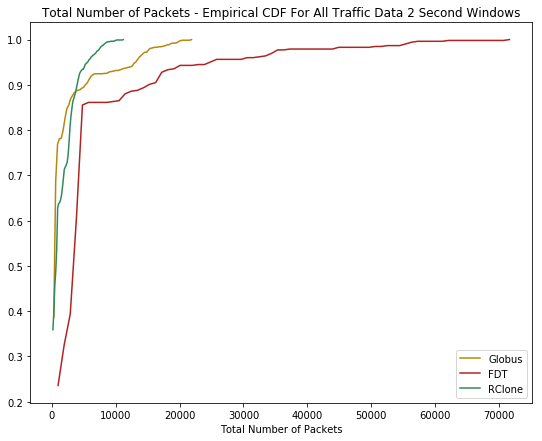

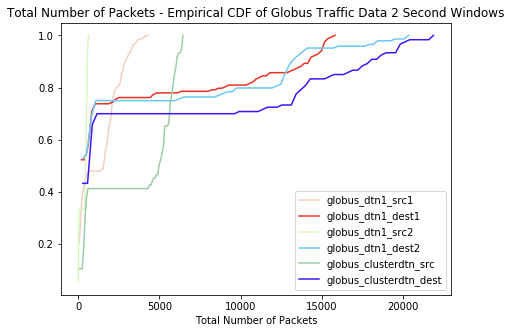

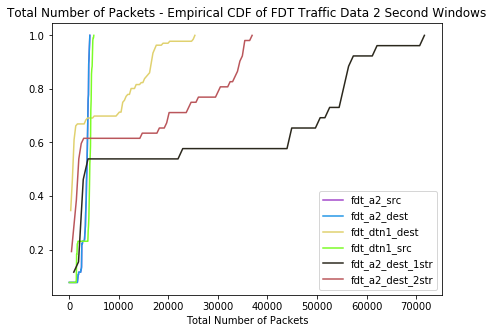

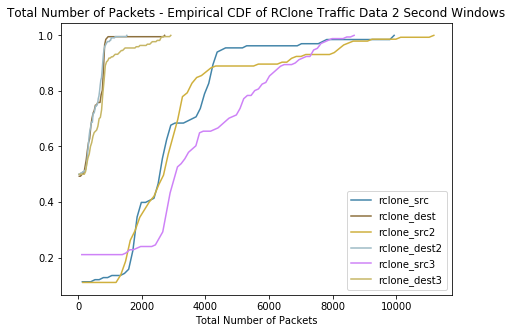

In [4]:
create_all_labels_ecdf(0, 75, 'Total Number of Packets', flow_features_dict)
create_label_ecdf(0, 75, 'Total Number of Packets', flow_features_dict)

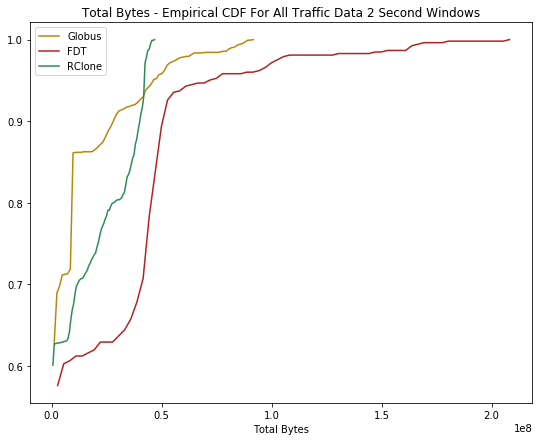

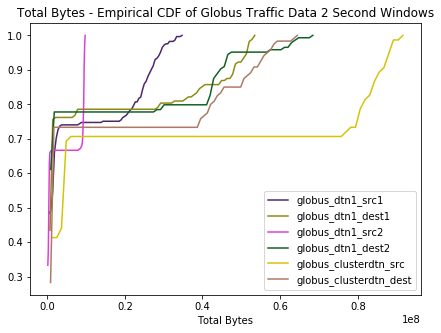

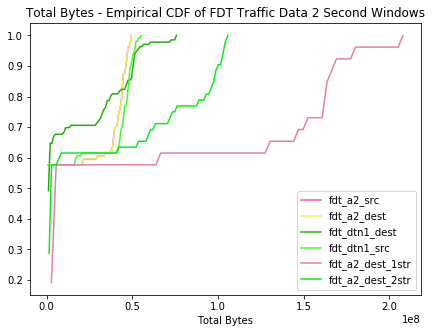

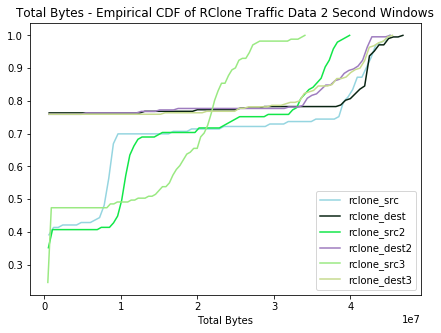

In [5]:
create_all_labels_ecdf(1, 75, 'Total Bytes', flow_features_dict)
create_label_ecdf(1, 75, 'Total Bytes', flow_features_dict)

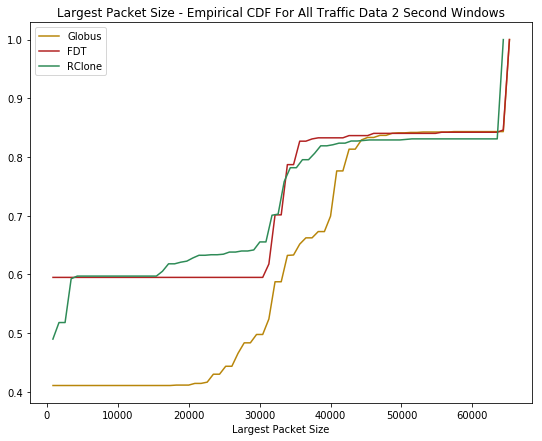

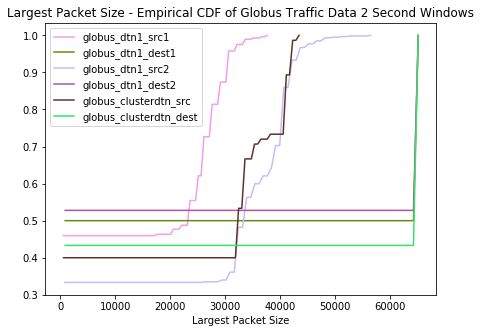

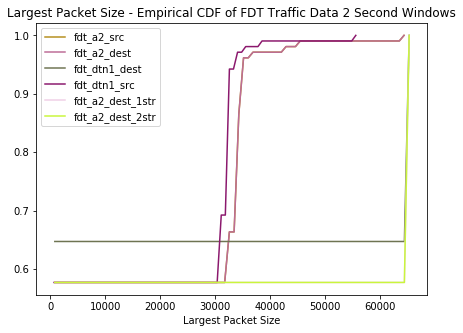

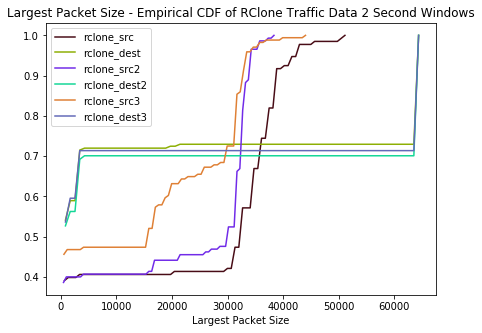

In [6]:
create_all_labels_ecdf(2, 75, 'Largest Packet Size', flow_features_dict)
create_label_ecdf(2, 75, 'Largest Packet Size', flow_features_dict)

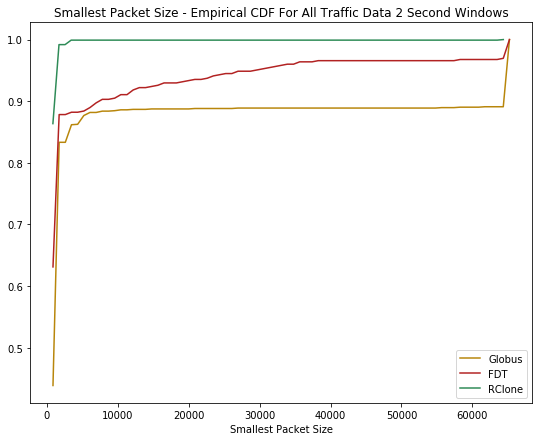

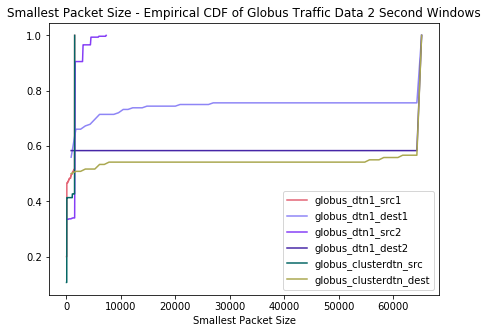

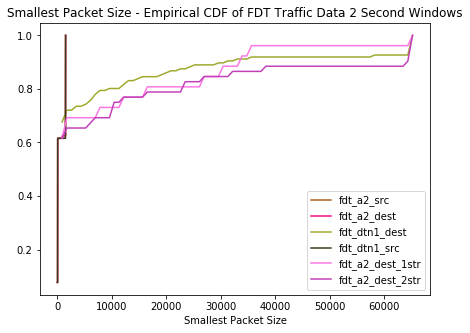

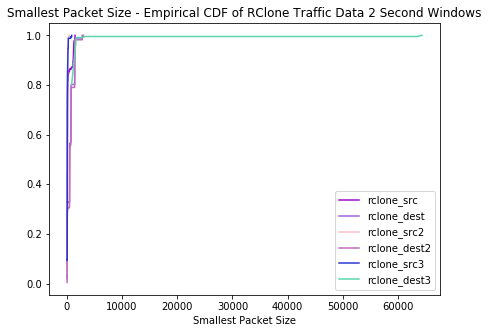

In [7]:
create_all_labels_ecdf(3, 75, 'Smallest Packet Size', flow_features_dict)
create_label_ecdf(3, 75, 'Smallest Packet Size', flow_features_dict)

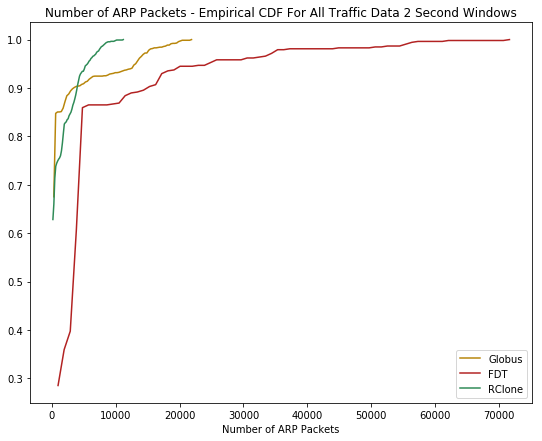

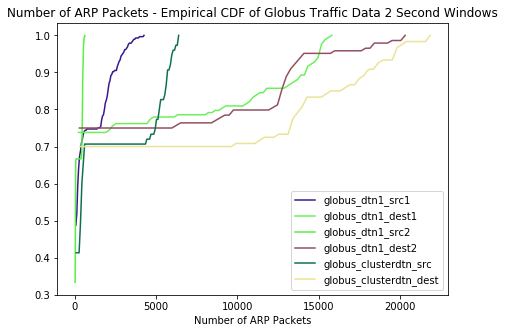

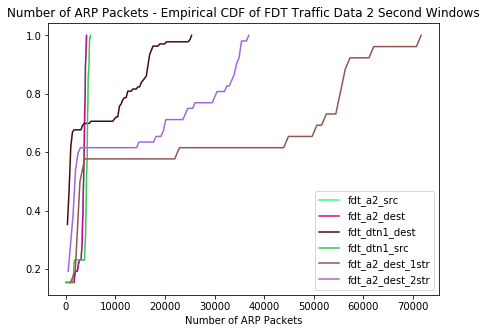

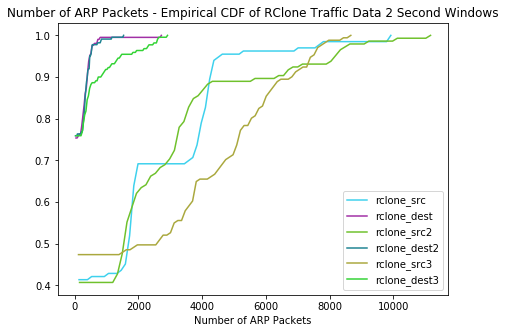

In [8]:
create_all_labels_ecdf(4, 75, 'Number of ARP Packets', flow_features_dict)
create_label_ecdf(4, 75, 'Number of ARP Packets', flow_features_dict)

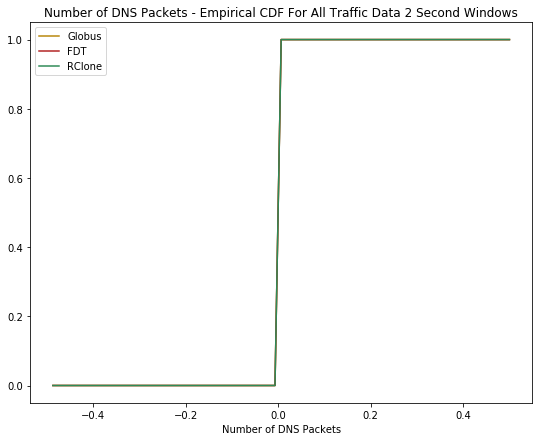

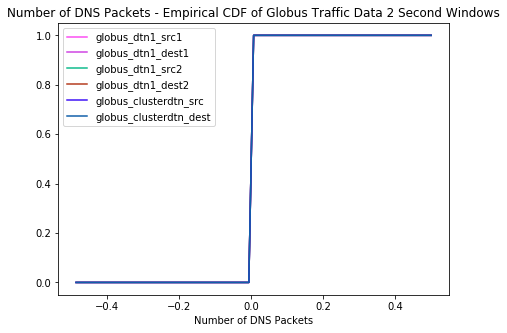

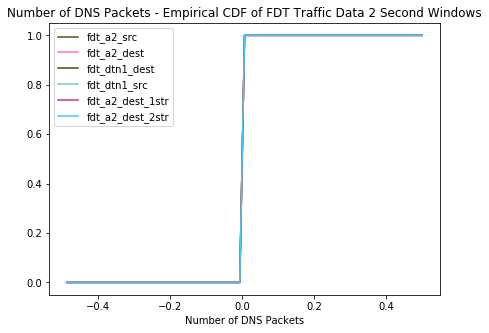

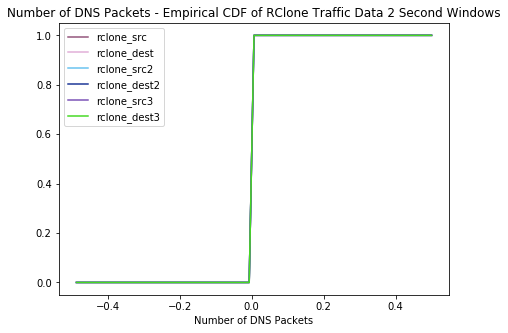

In [9]:
create_all_labels_ecdf(5, 75, 'Number of DNS Packets', flow_features_dict)
create_label_ecdf(5, 75, 'Number of DNS Packets', flow_features_dict)

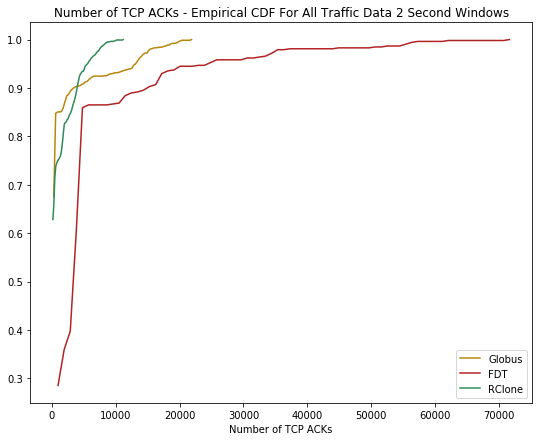

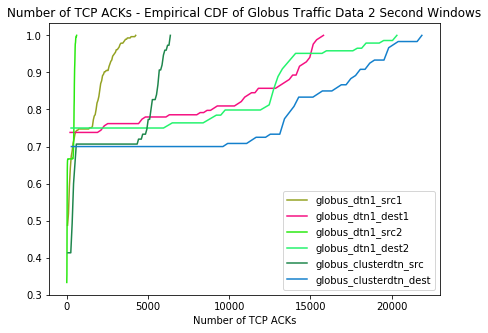

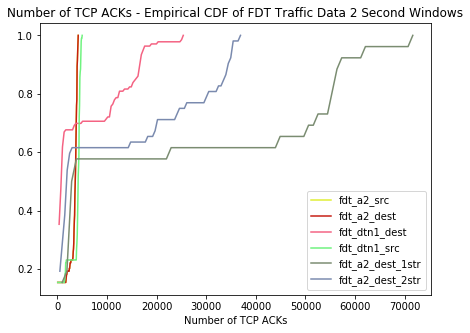

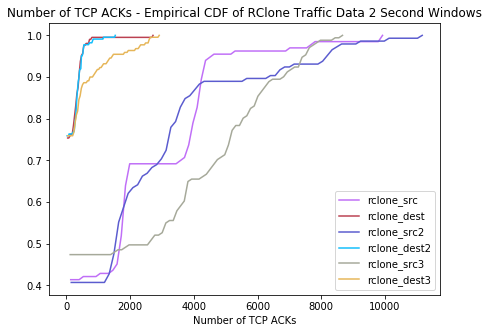

In [10]:
create_all_labels_ecdf(6, 75, 'Number of TCP ACKs', flow_features_dict)
create_label_ecdf(6, 75, 'Number of TCP ACKs', flow_features_dict)

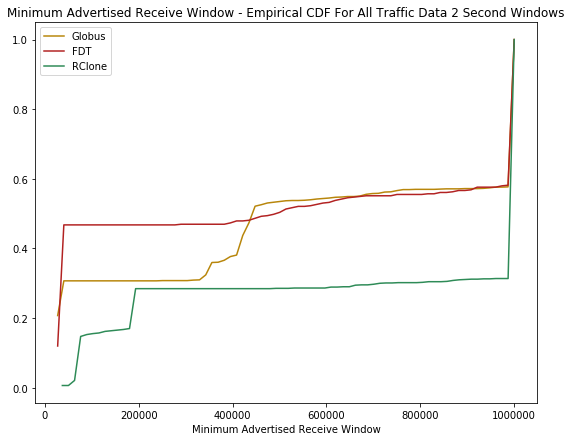

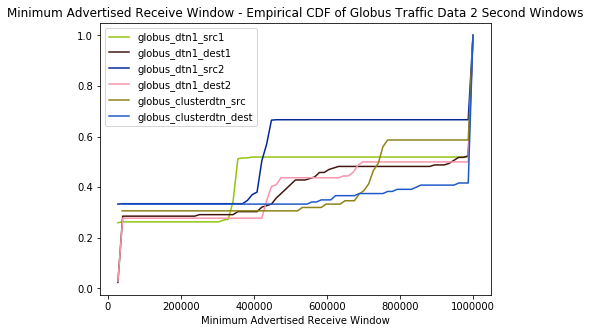

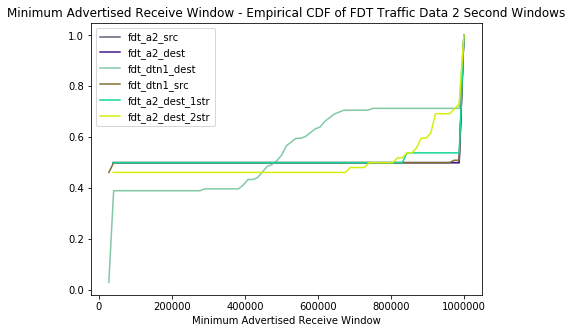

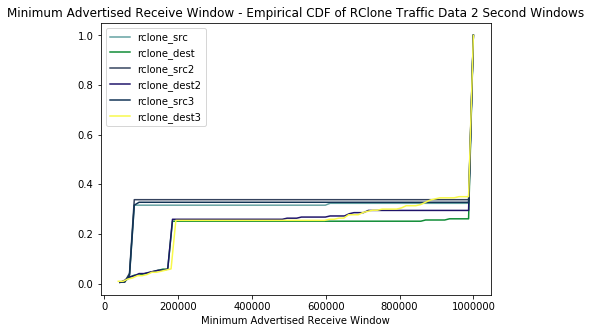

In [11]:
create_all_labels_ecdf(7, 75, 'Minimum Advertised Receive Window', flow_features_dict)
create_label_ecdf(7, 75, 'Minimum Advertised Receive Window', flow_features_dict)

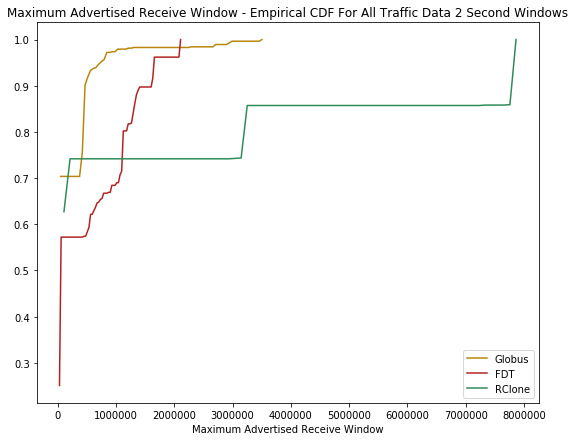

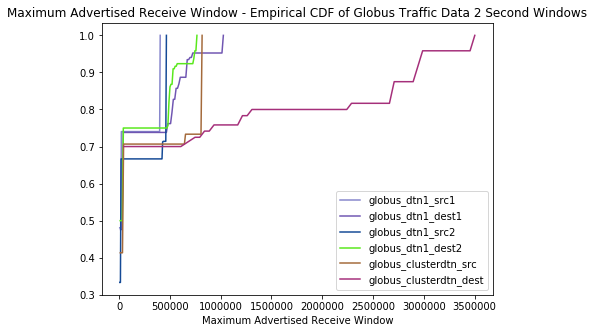

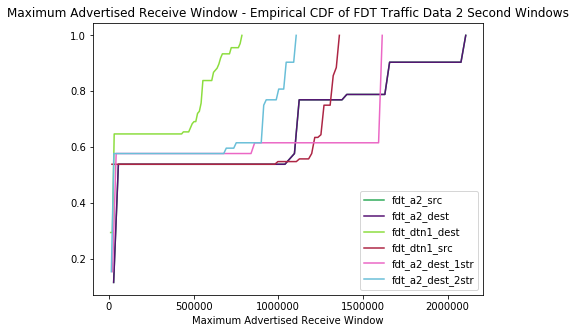

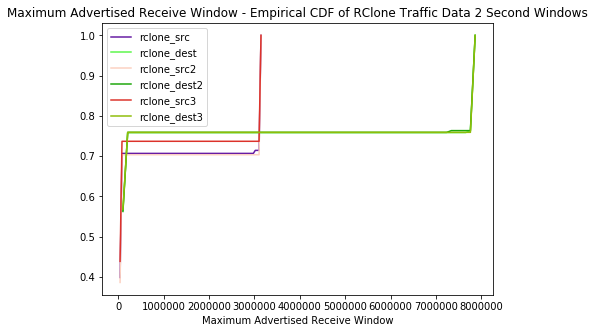

In [12]:
create_all_labels_ecdf(8, 75, 'Maximum Advertised Receive Window', flow_features_dict)
create_label_ecdf(8, 75, 'Maximum Advertised Receive Window', flow_features_dict)

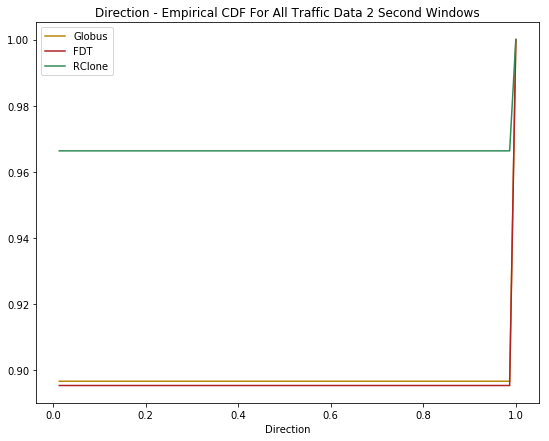

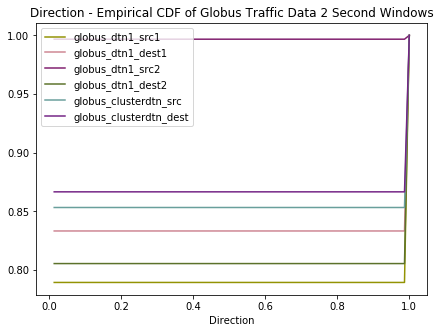

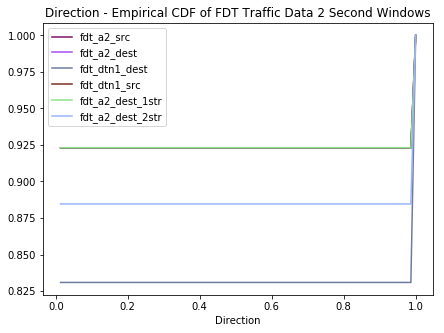

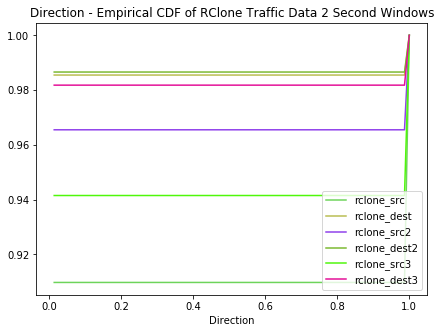

In [13]:
create_all_labels_ecdf(9, 75, 'Direction', flow_features_dict)
create_label_ecdf(9, 75, 'Direction', flow_features_dict)

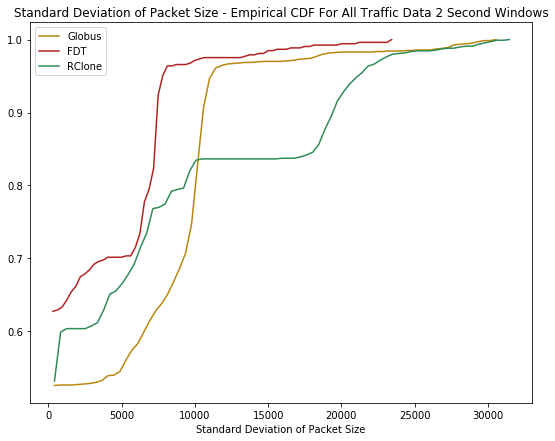

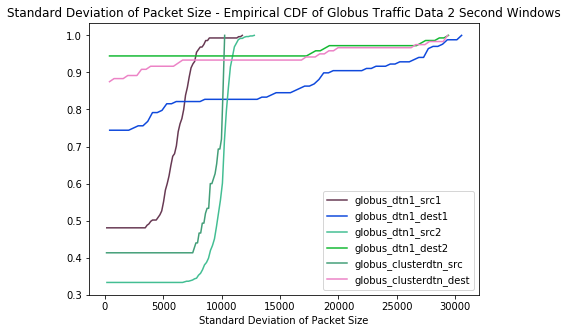

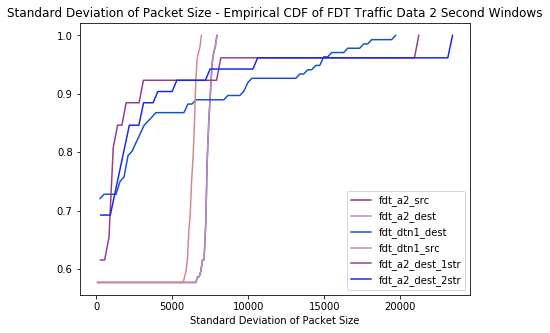

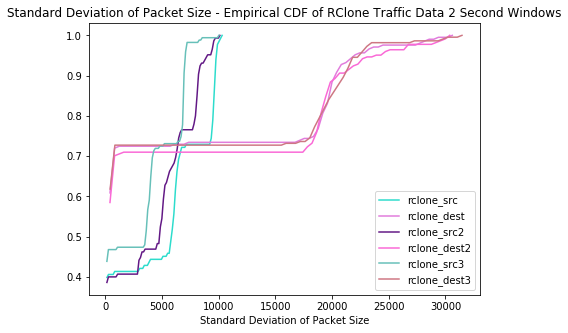

In [14]:
create_all_labels_ecdf(10, 75, 'Standard Deviation of Packet Size', flow_features_dict)
create_label_ecdf(10, 75, 'Standard Deviation of Packet Size', flow_features_dict)

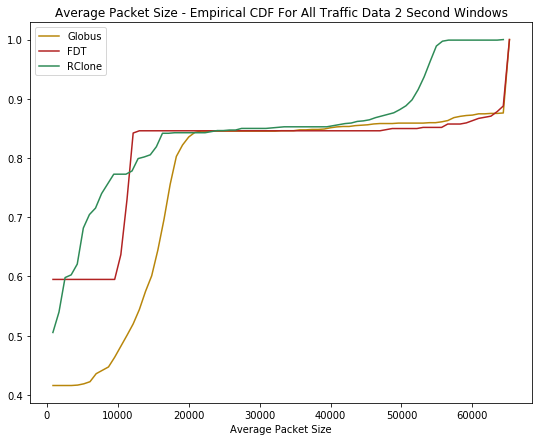

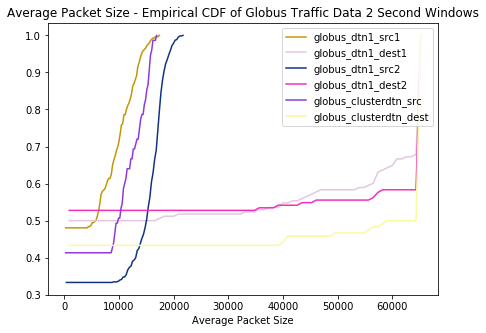

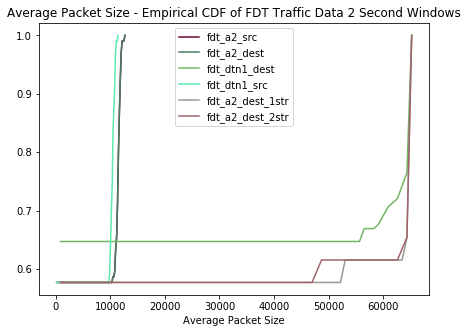

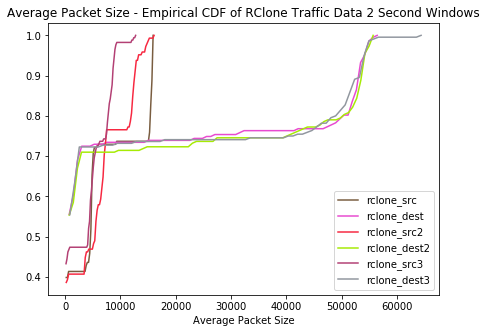

In [15]:
create_all_labels_ecdf(11, 75, 'Average Packet Size', flow_features_dict)
create_label_ecdf(11, 75, 'Average Packet Size', flow_features_dict)

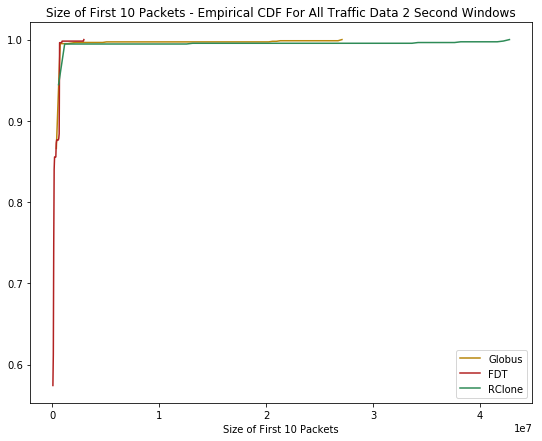

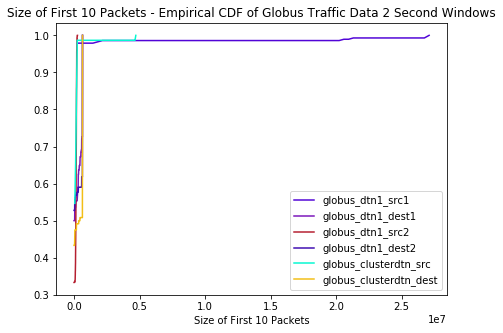

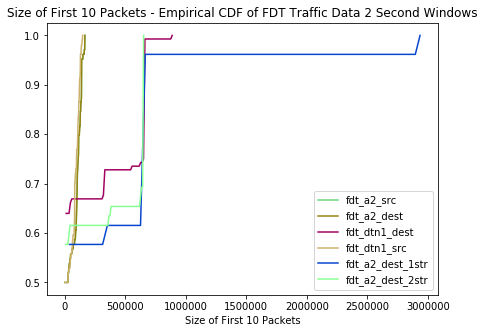

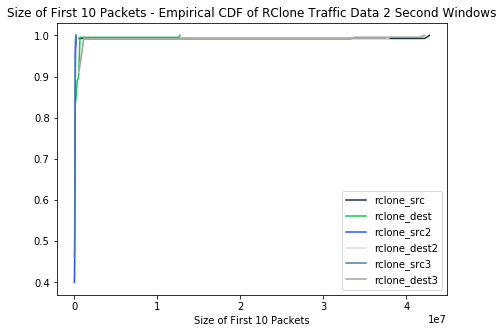

In [16]:
create_all_labels_ecdf(12, 75, 'Size of First 10 Packets', flow_features_dict)
create_label_ecdf(12, 75, 'Size of First 10 Packets', flow_features_dict)

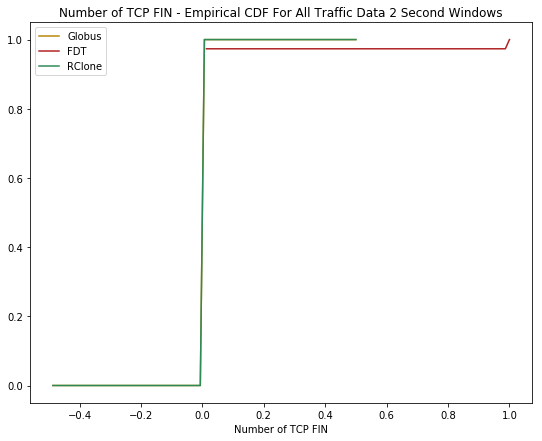

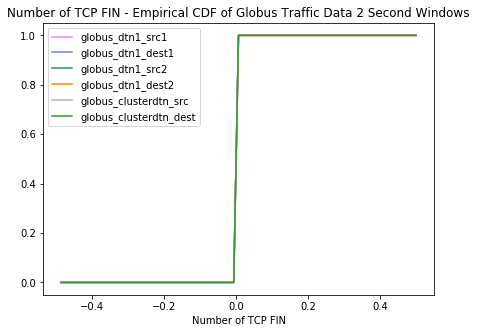

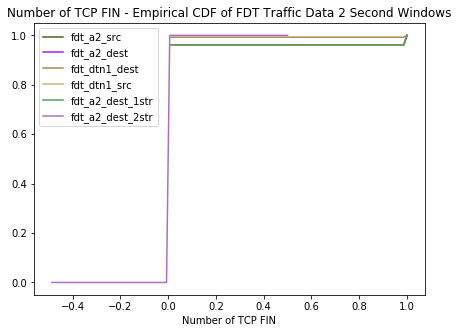

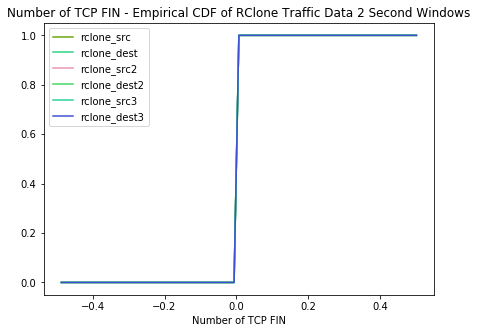

In [17]:
create_all_labels_ecdf(13, 75, 'Number of TCP FIN', flow_features_dict)
create_label_ecdf(13, 75, 'Number of TCP FIN', flow_features_dict)

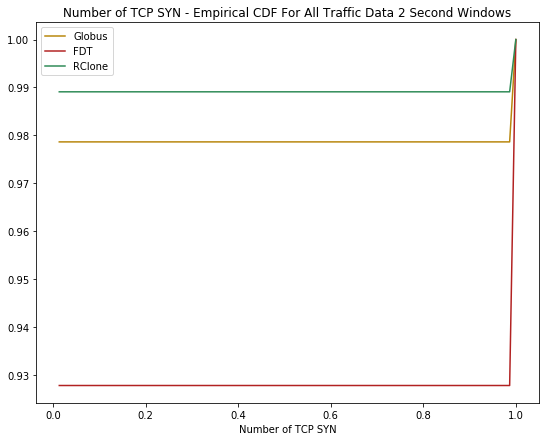

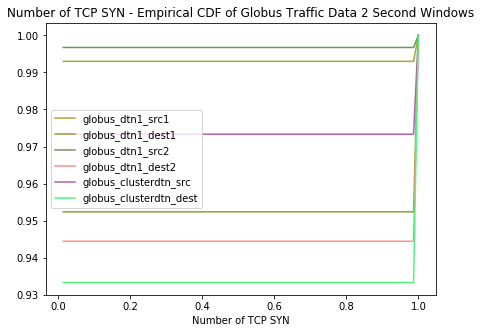

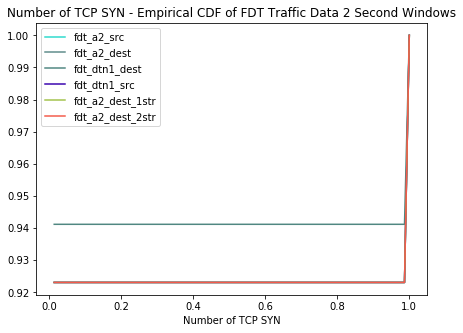

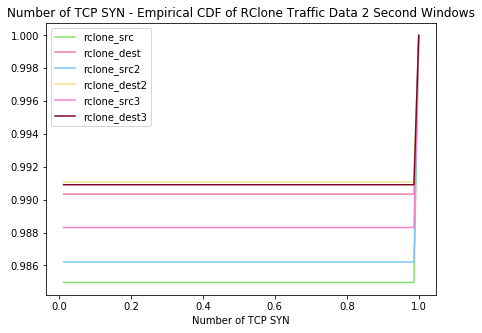

In [18]:
create_all_labels_ecdf(14, 75, 'Number of TCP SYN', flow_features_dict)
create_label_ecdf(14, 75, 'Number of TCP SYN', flow_features_dict)

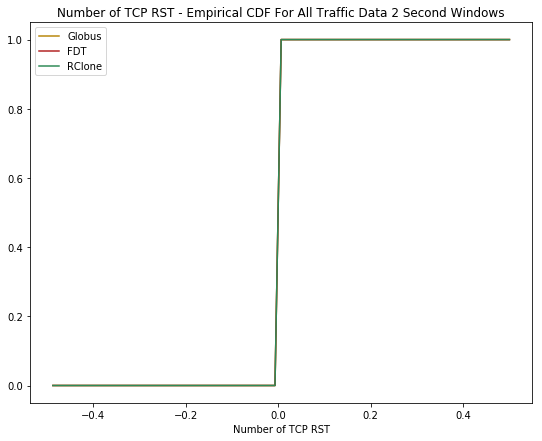

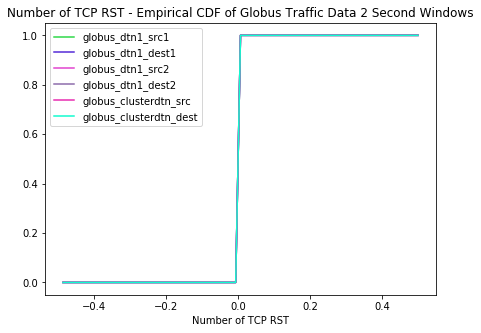

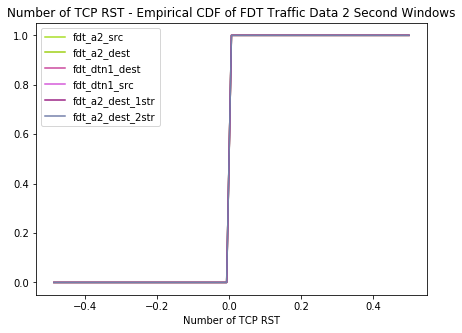

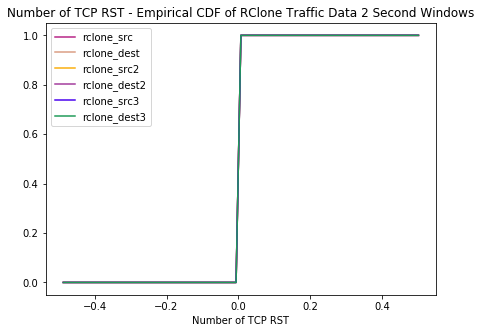

In [19]:
create_all_labels_ecdf(15, 75, 'Number of TCP RST', flow_features_dict)
create_label_ecdf(15, 75, 'Number of TCP RST', flow_features_dict)

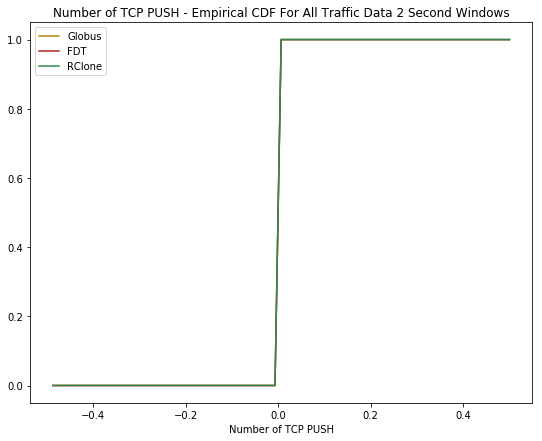

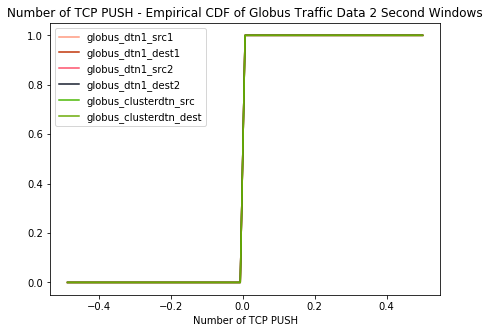

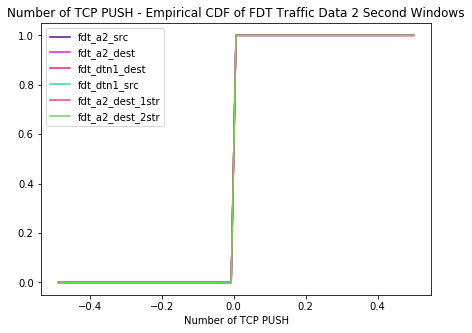

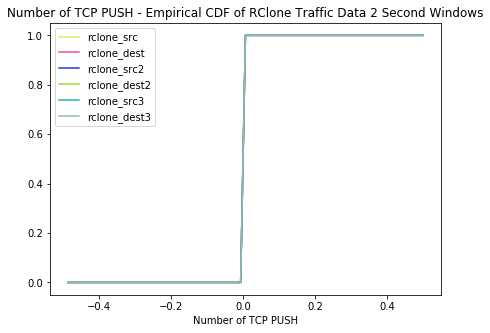

In [20]:
create_all_labels_ecdf(16, 75, 'Number of TCP PUSH', flow_features_dict)
create_label_ecdf(16, 75, 'Number of TCP PUSH', flow_features_dict)

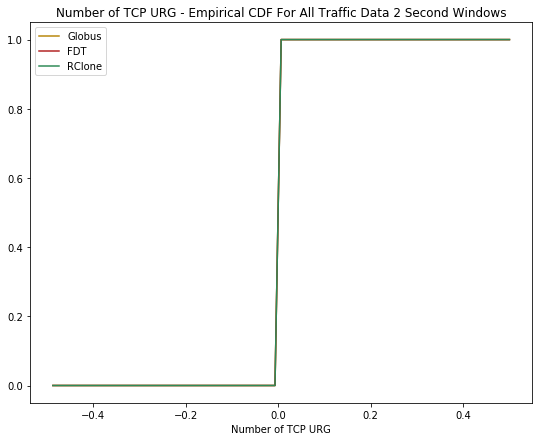

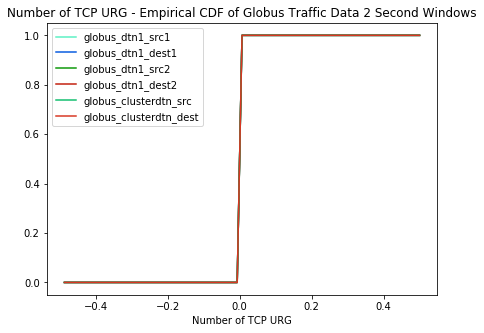

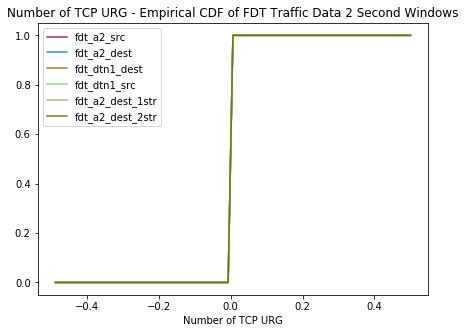

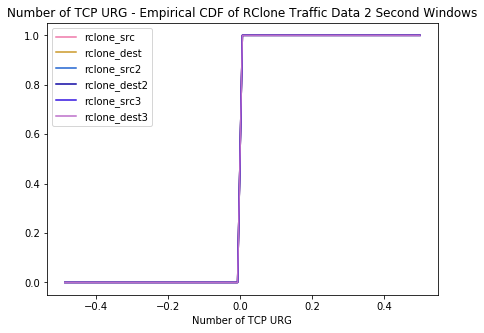

In [21]:
create_all_labels_ecdf(17, 75, 'Number of TCP URG', flow_features_dict)
create_label_ecdf(17, 75, 'Number of TCP URG', flow_features_dict)

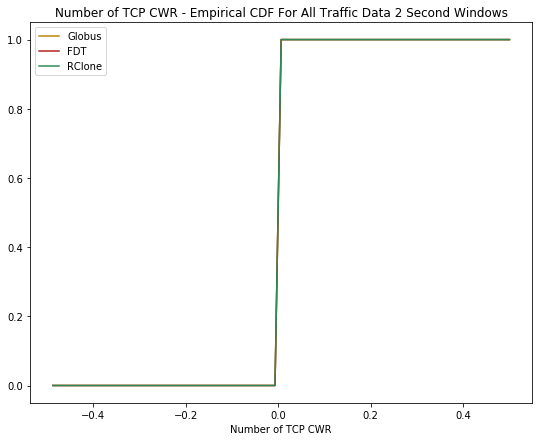

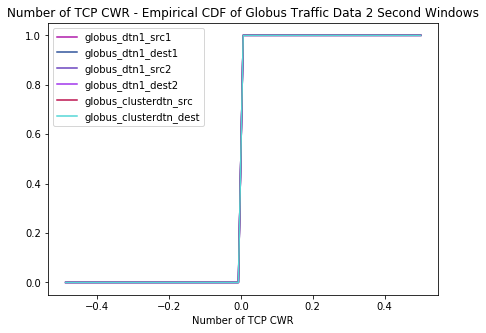

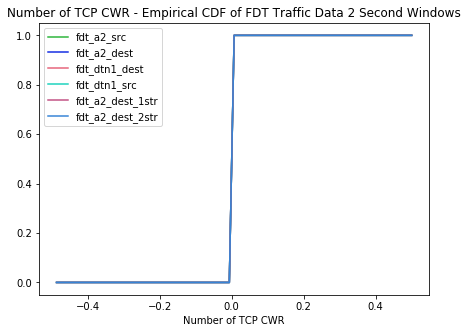

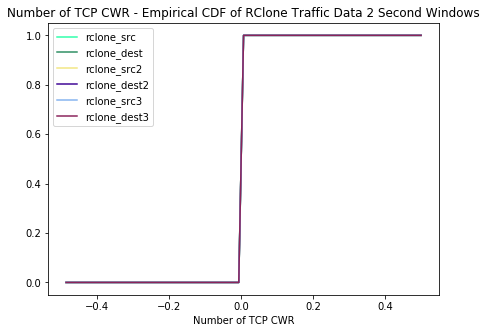

In [22]:
create_all_labels_ecdf(18, 75, 'Number of TCP CWR', flow_features_dict)
create_label_ecdf(18, 75, 'Number of TCP CWR', flow_features_dict)

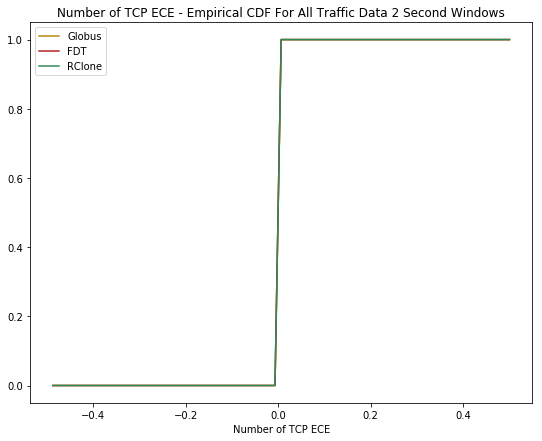

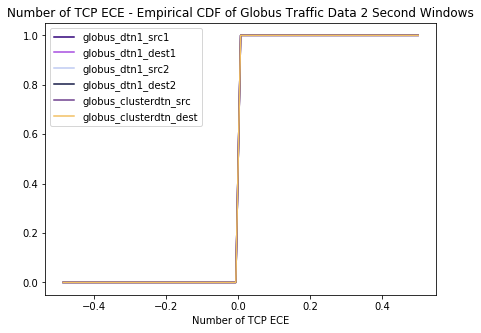

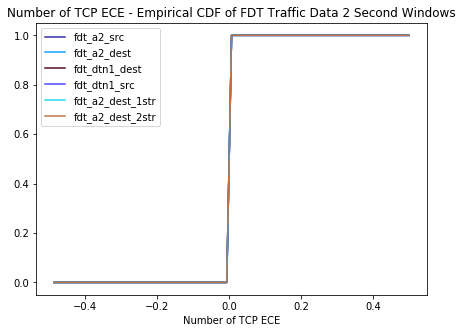

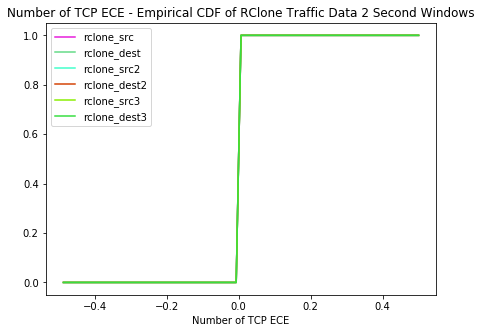

In [23]:
create_all_labels_ecdf(19, 75, 'Number of TCP ECE', flow_features_dict)
create_label_ecdf(19, 75, 'Number of TCP ECE', flow_features_dict)

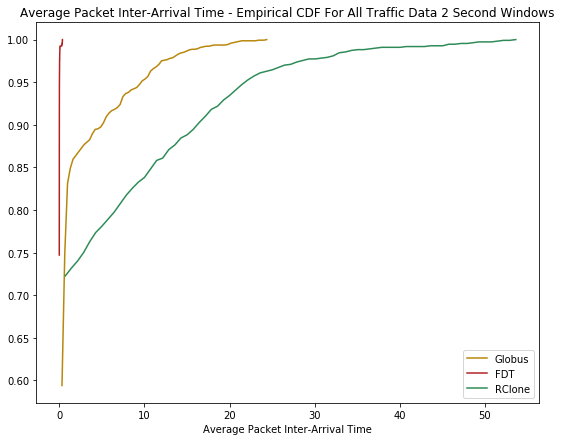

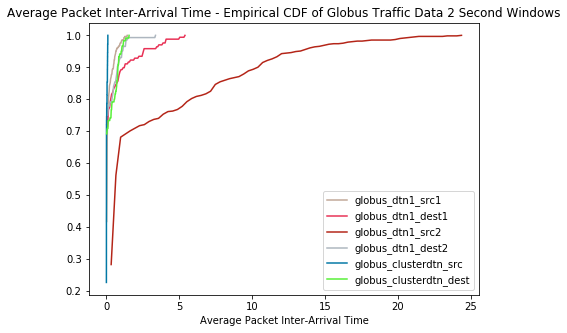

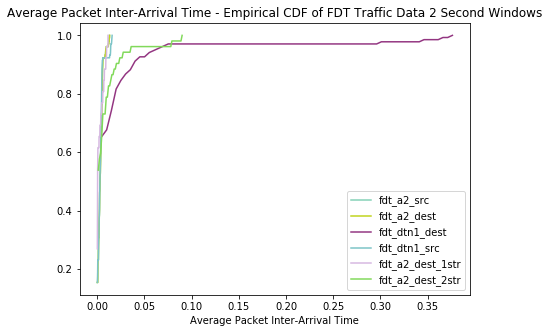

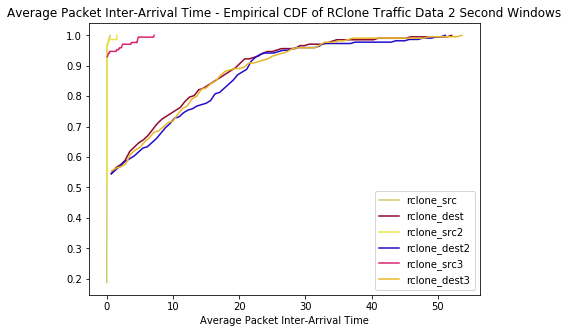

In [24]:
create_all_labels_ecdf(20, 75, 'Average Packet Inter-Arrival Time', flow_features_dict)
create_label_ecdf(20, 75, 'Average Packet Inter-Arrival Time', flow_features_dict)

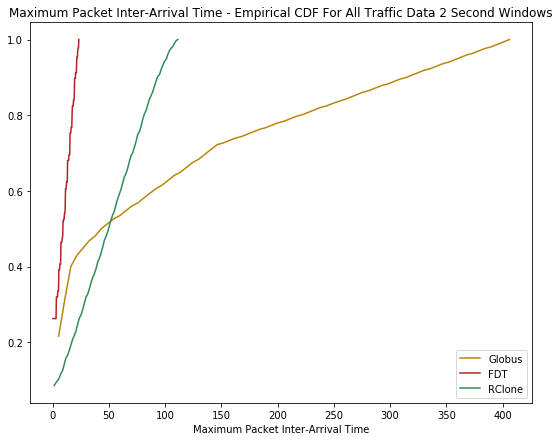

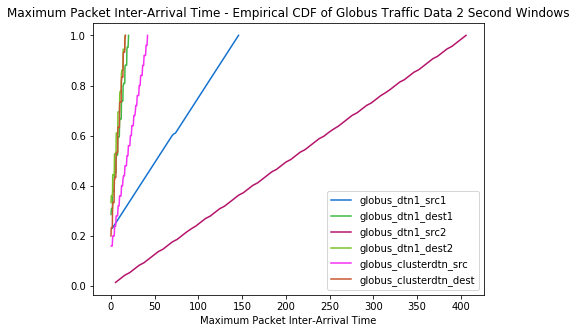

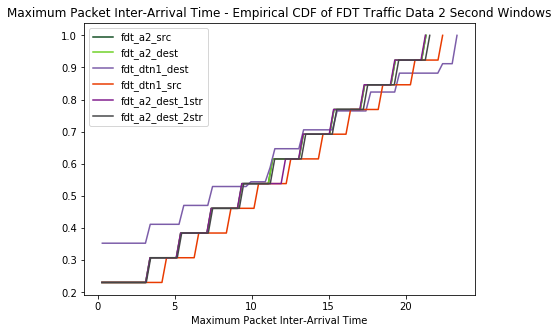

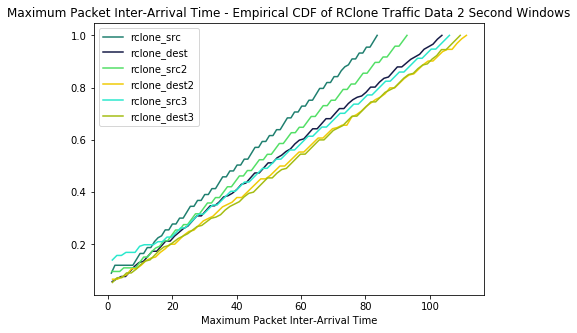

In [25]:
create_all_labels_ecdf(21, 75, 'Maximum Packet Inter-Arrival Time', flow_features_dict)
create_label_ecdf(21, 75, 'Maximum Packet Inter-Arrival Time', flow_features_dict)

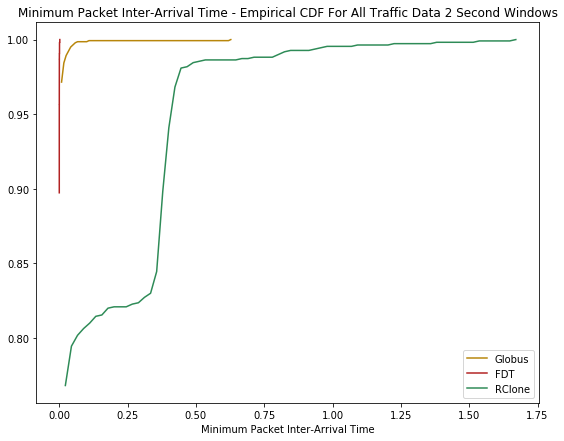

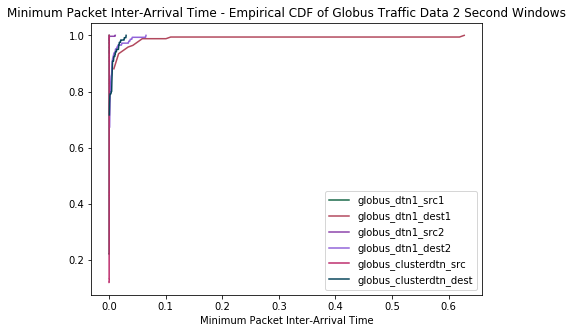

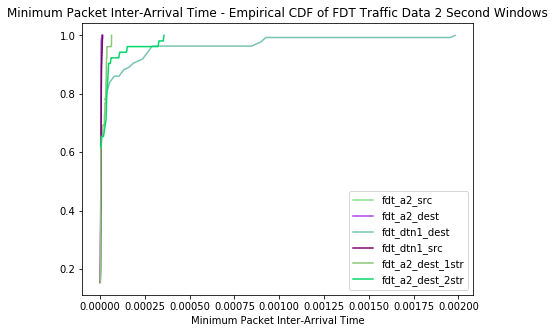

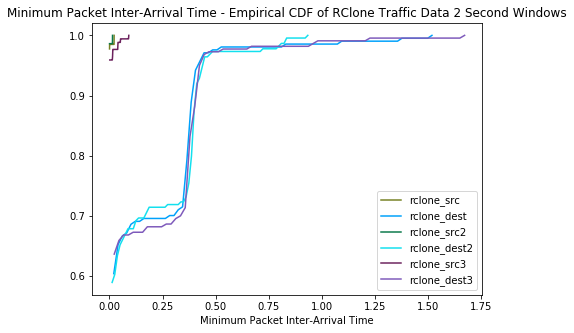

In [26]:
create_all_labels_ecdf(22, 75, 'Minimum Packet Inter-Arrival Time', flow_features_dict)
create_label_ecdf(22, 75, 'Minimum Packet Inter-Arrival Time', flow_features_dict)

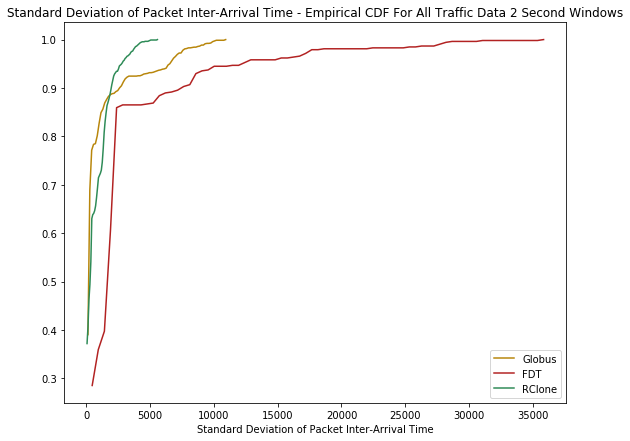

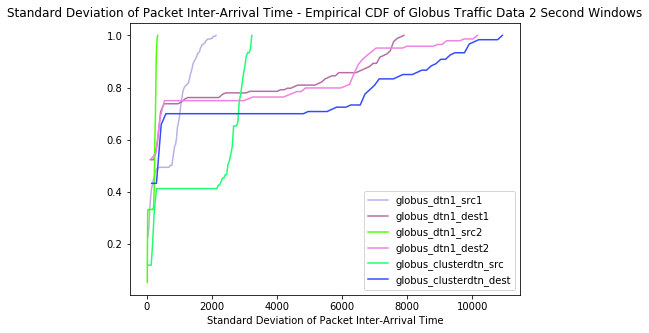

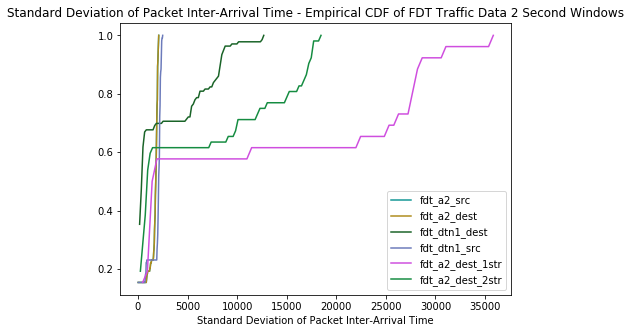

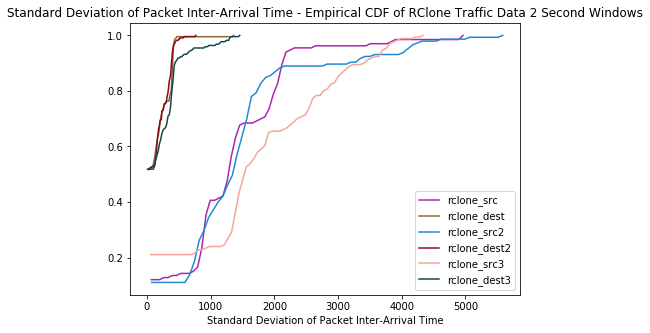

In [27]:
create_all_labels_ecdf(23, 75, 'Standard Deviation of Packet Inter-Arrival Time', flow_features_dict)
create_label_ecdf(23, 75, 'Standard Deviation of Packet Inter-Arrival Time', flow_features_dict)

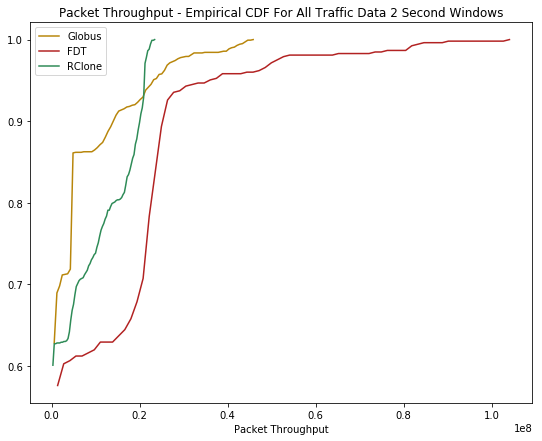

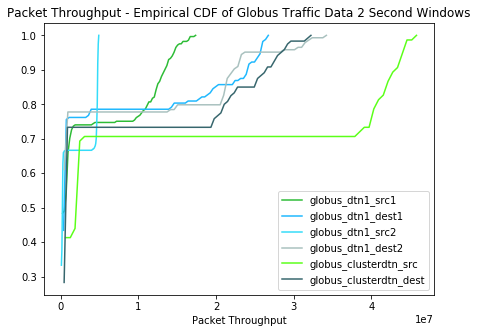

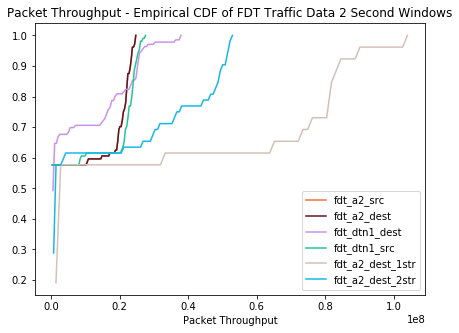

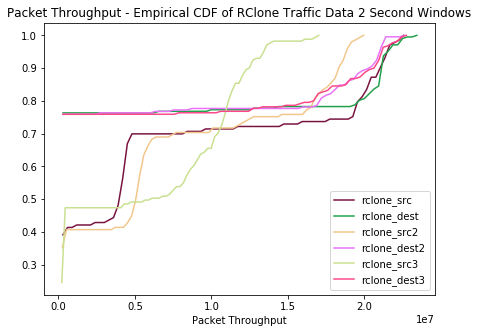

In [28]:
create_all_labels_ecdf(24, 75, 'Packet Throughput', flow_features_dict)
create_label_ecdf(24, 75, 'Packet Throughput', flow_features_dict)

In [29]:
create_all_labels_ecdf(25, 75, 'Byte Throughput', flow_features_dict)
create_label_ecdf(25, 75, 'Byte Throughput', flow_features_dict)

IndexError: index 25 is out of bounds for axis 0 with size 25